In [4]:
%reload_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import tensorly.random as tl_rand
import tensorly.kruskal_tensor as tl_kruskal
import numpy as np
from timeit import default_timer as timer
 
from BLOCK_SPG_CPD import bras_CPD
from BLOCK_SPG_CPD import ada_CPD

In [11]:
# Set up
# Generate random latent factors
rank = 100
F = tl_rand.random_kruskal((300,300,300), rank, full=False, random_state=np.random.RandomState(seed=0))
X = tl_kruskal.kruskal_to_tensor(F)
B = 18
b = 10**-6
eps = 0
eta = 1
num_iterations = 75000

In [12]:
# Run ada_CPD update
start = timer()
res_error, mse, A = ada_CPD(F, X, rank, B, eta, b, eps, num_iterations)
end = timer()



iteration: 4999
iteration: 9999
iteration: 14999
iteration: 19999
iteration: 24999
iteration: 29999
iteration: 34999
iteration: 39999
iteration: 44999
iteration: 49999
iteration: 54999
iteration: 59999
iteration: 64999
iteration: 69999
iteration: 74999
33576.505853929004


In [19]:
np.save("res_ada.txt", res_error)
np.save("mse_ada.txt", mse)
np.save("factors_ada.txt", A)

<Figure size 432x288 with 0 Axes>

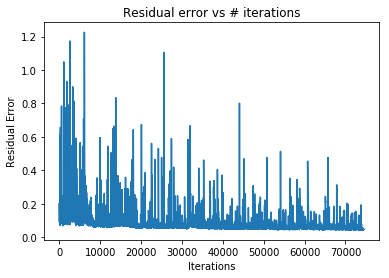

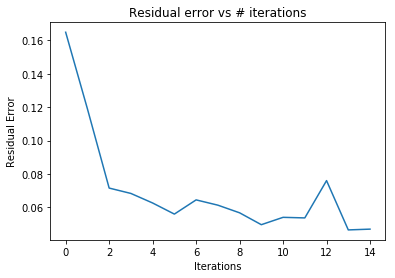

<Figure size 432x288 with 0 Axes>

In [17]:
x = range(74501)
plt.title('Residual error vs # iterations')
plt.xlabel('Iterations')
plt.ylabel('Residual Error')
plt.plot(x, res_error[500:])  
plt.figure()

y_new = []
for i in range(0,75000, 5000):
    y_new.append(res_error[i])

x = range(len(y_new))
plt.title('Residual error vs # iterations')
plt.xlabel('Iterations')
plt.ylabel('Residual Error')
plt.plot(x, y_new)  
plt.figure()


<Figure size 432x288 with 0 Axes>

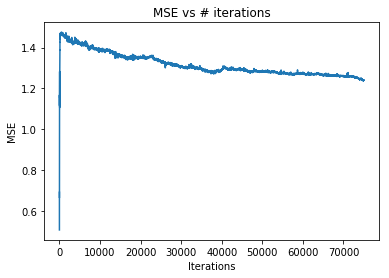

<Figure size 432x288 with 0 Axes>

In [18]:
x = range(75001)
plt.title('MSE vs # iterations')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.plot(x, mse)  
plt.figure()

In [8]:
# Run bras_cpd update
res_errors = []
mses = []
for alpha in alphas:
    res_error, mse = bras_CPD(F, X, rank, B, alpha, beta, num_iterations)
    res_errors.append(res_error)
    mses.append(mse)

Iteration: 999
Iteration: 999
Iteration: 999


<Figure size 432x288 with 0 Axes>

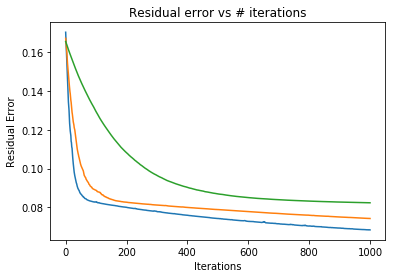

<Figure size 432x288 with 0 Axes>

In [9]:
for i in range(3):
    x = range(1001)
    plt.title('Residual error vs # iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Residual Error')
    plt.plot(x, res_errors[i])  
plt.figure()

<Figure size 432x288 with 0 Axes>

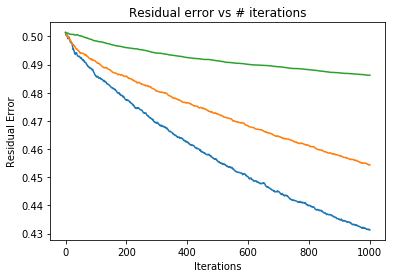

<Figure size 432x288 with 0 Axes>

In [10]:
for i in range(3):
    x = range(1001)
    plt.title('Residual error vs # iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Residual Error')
    plt.plot(x, mses[i])  
plt.figure()